In [6]:
import pandas as pd
import csv
from sklearn import neighbors
from sklearn import datasets
import numpy as np



## User study to test KnnDecisionBoundariesVisualizer

In [7]:
#function that loads the school data csv and returns X,y
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def load_adm_sat_school_data(file_path="./examples/balavenkatesan/merged_adm_sat_data.csv", return_X_y=False):

    with open(file_path) as csv_file:
        data_file = csv.reader(csv_file)
        temp = next(data_file)
        n_samples = int(temp[0])
        n_features = int(temp[1])
        target_names = np.array(temp[2:])


    df = pd.read_csv(file_path, sep=",", usecols=(0, 1, 2, 3), skiprows=0)
    data = np.empty((n_samples, n_features), dtype=int)
    target = np.ma.empty((n_samples,), dtype=int)

    for index, row in df.iterrows():
        data[index] = np.asarray([df.iloc[index][0], df.iloc[index][1], df.iloc[index][2]], dtype=np.float)
        target[index] = np.asarray(df.iloc[index][3], dtype=np.int)

    feature_names = np.array(['ACT_AVG','SAT_AVG','GRAD_DEBT','REGION'])

    if return_X_y:
        return data, target

    return datasets.base.Bunch(data=data, target=target,
                 target_names=target_names,
                 DESCR='School Data set',
                 feature_names=feature_names)


In [8]:
#function taken from sklearn site that draws a KNN classifier using matplotlib
def show_plot(model, X, y, n_neighbors=10, h=0.2):
    # Create color maps
    cmap_light = plt.get_cmap('Pastel1')
    cmap_bold = plt.get_cmap('Dark2')

    # we create an instance of Neighbours Classifier and fit the data.
    model.fit(X, y)
    model.predict(X)
    #model.n_neighbors = n_neighbors

    # Plot the decision boundary. For that, we will asign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.set_cmap(plt.cm.Paired)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlabel('SAT Scores')
    plt.ylabel('ACT Scores')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

<IPython.core.display.Javascript object>


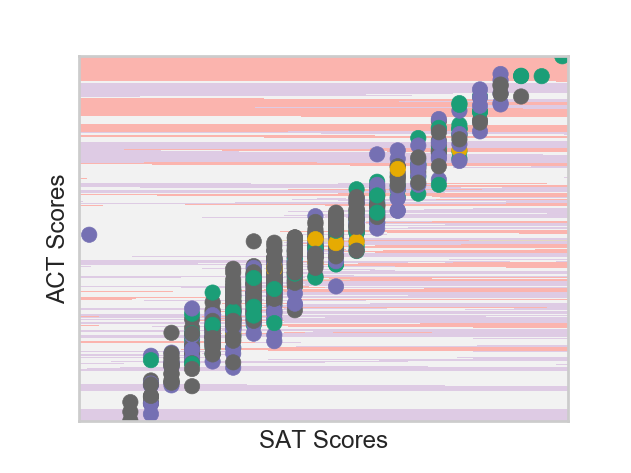

In [9]:
%matplotlib notebook
school = load_adm_sat_school_data()
X = school.data[:, :2]  # we only take the first two features.
y = school.target
model = neighbors.KNeighborsClassifier(4)
show_plot(model, X,y)

In [10]:

## commented due to out of memory error
import yellowbrick as yb
from yellowbrick.neighbors import KnnDecisionBoundariesVisualizer
visualizer = KnnDecisionBoundariesVisualizer(model, classes=school.target_names, features=school.feature_names[:2])
visualizer = KnnDecisionBoundariesVisualizer(model)
#visualizer.fit_draw_poof(X, y)